In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

In [7]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [8]:
df = pd.read_csv('/Users/safarji/Downloads/sephora_website_dataset.csv')

In [9]:

print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

(9168, 21)

In [10]:
df.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [11]:
df.head()

Size = df["size"]


Size

0         5 x 0.16oz/5mL
1          0.7 oz/ 20 mL
2           5 oz/ 148 mL
3          2.5 oz/ 74 mL
4         5 x 0.16oz/5mL
              ...       
9163             no size
9164    3 x 0.32 oz/ 9 g
9165     0.946 oz/ 28 mL
9166             no size
9167             no size
Name: size, Length: 9168, dtype: object

In [12]:
Size = Size.replace("no size", np.nan)
#f = lambda x: str(x).split()[0].strip() if x != np.nan else np.nan
#g = lambda x: float(x) if x != np.nan else np.nan
#for idx, s in enumerate(Size):

   # if 'oz' in str(s):
        #Size[idx] = s.replace('oz','').replace(" ","")
   # elif '/' in str(s):
        #Size[idx] = s.replace('/','')
        
        
    #print(s)
    
Size

#Size= Size.map(f)

0         5 x 0.16oz/5mL
1          0.7 oz/ 20 mL
2           5 oz/ 148 mL
3          2.5 oz/ 74 mL
4         5 x 0.16oz/5mL
              ...       
9163                 NaN
9164    3 x 0.32 oz/ 9 g
9165     0.946 oz/ 28 mL
9166                 NaN
9167                 NaN
Name: size, Length: 9168, dtype: object

In [543]:
Size1 = [] 
cn=0
c=0
for n in Size:
    m = re.search('(\d*\.?\d+)\s*(mL?|ml)', n)
    if m == "NaN":
        Size1.append(np.nan)
        cn +=1
    else:
        Size1.append(m.group(0))
        c+=1

TypeError: expected string or bytes-like object

In [13]:
import re


In [545]:
Size_1

[]

In [179]:
[str(s) for s in Size.str.split() if s.isdigit()]




AttributeError: 'list' object has no attribute 'isdigit'

In [14]:
Size = (
    Size.str.extract(r"(?i)(\d+(?:\.\d+)?)\s*[kmd]?ml\b", expand=False).astype(float)
    
)


In [15]:
Size.dropna(inplace= True)

In [16]:
Size   #ml

0         5.0
1        20.0
2       148.0
3        74.0
4         5.0
        ...  
9152    190.0
9155    400.0
9159    200.0
9162    250.0
9165     28.0
Name: size, Length: 4089, dtype: float64

In [17]:
df["size"]=Size 

In [18]:
df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5.0,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,20.0,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,148.0,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,74.0,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5.0,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,NaN,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,NaN,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,28.0,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,NaN,5.0,46,0,50.0,50.0,...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


In [19]:
df.dropna()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5.0,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,20.0,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,148.0,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,74.0,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5.0,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9152,1662410,SEPHORA COLLECTION,Face Wash & Cleansers,Supreme Cleansing Oil,190.0,4.5,357,15800,15.0,15.0,...,True,exclusive,no options,What it is:\nA cleansing oil with the effectiv...,Suggested Usage:\n-Dispense one dose from the ...,-Cottonseed Oil: Nourishes and provides smoot...,0,1,0,0
9155,2271062,SEPHORA COLLECTION,Scrub & Exfoliants,Sugar Body Scrub,400.0,4.0,6,1900,17.0,17.0,...,True,exclusive,no options,What it is: A sugar body scrub that exfoliate...,Suggested Usage:-Apply in the shower twice a w...,-Brown Sugar from Natural Origin: Known to gen...,0,1,0,0
9159,2102804,SEPHORA COLLECTION,Body Lotions & Body Oils,Moisturizing Body Milk - Beach Vibes,200.0,4.0,32,4800,12.0,12.0,...,True,exclusive · online only,no options,Which skin type is it good for?✔ Normal✔ Oily✔...,Suggested Usage:-Apply to dry skin- ideally af...,Water- Glycerin- Dimethicone- Isopropyl Palmit...,1,1,0,0
9162,2149839,SEPHORA COLLECTION,Scrub & Exfoliants,Exfoliating Body Granita Scrub - Surprise Flowers,250.0,3.5,39,6900,8.0,8.0,...,True,exclusive · online only,no options,What it is: An indulgent- yet gentle exfoliat...,Suggested Usage:-Apply to wet skin.-Massage in...,Water- Glycerin- Cellulose Acetate- Sodium Lau...,1,1,0,0


In [54]:
df_c = df.select_dtypes(include=['object'])
df_c.head()


df_c.drop(['URL', "details","options","ingredients","how_to_use"], axis=1 , inplace=True)


/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
df.brand

#df.duplicated().sum()
# remove duplicated rows
#df=df.drop_duplicates()

0           Acqua Di Parma
1           Acqua Di Parma
2           Acqua Di Parma
3           Acqua Di Parma
4           Acqua Di Parma
               ...        
9163    SEPHORA COLLECTION
9164    SEPHORA COLLECTION
9165    SEPHORA COLLECTION
9166    SEPHORA COLLECTION
9167    SEPHORA COLLECTION
Name: brand, Length: 9168, dtype: object

In [22]:
#to_drop=['id', 'details', 'how_to_use','ingredients']
#df=df.drop(columns=to_drop)
ff=['URL']
#df.drop(['URL'])

#df.columns = df.columns.str.strip()
#df.reset_index()
#df.drop(columns=ff, inplace=True)
df

df.isnull().mean().sort_values(ascending=True)

id                        0.000000
exclusive                 0.000000
online_only               0.000000
ingredients               0.000000
how_to_use                0.000000
details                   0.000000
options                   0.000000
MarketingFlags_content    0.000000
MarketingFlags            0.000000
limited_edition           0.000000
URL                       0.000000
price                     0.000000
love                      0.000000
number_of_reviews         0.000000
rating                    0.000000
name                      0.000000
category                  0.000000
brand                     0.000000
value_price               0.000000
limited_time_offer        0.000000
size                      0.553992
dtype: float64

In [56]:
df_c.head()

,brand,category,name,MarketingFlags_content
0,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,online only
1,Acqua Di Parma,Cologne,Colonia,online only
2,Acqua Di Parma,Perfume,Arancia di Capri,online only
3,Acqua Di Parma,Perfume,Mirto di Panarea,online only
4,Acqua Di Parma,Fragrance,Colonia Miniature Set,online only


In [57]:
df_dumy = pd.get_dummies(df_c, drop_first=True)
df_dumy.head()



,brand_AERIN,brand_ALTERNA Haircare,brand_AMOREPACIFIC,brand_Acqua Di Parma,brand_Aether Beauty,brand_Algenist,brand_Alpha-H,brand_Anastasia Beverly Hills,brand_Anthony,brand_Antonym,...,name_’REPLICA’ Sailing Day Travel Spray,MarketingFlags_content_exclusive,MarketingFlags_content_exclusive · online only,MarketingFlags_content_limited edition,MarketingFlags_content_limited edition · exclusive,MarketingFlags_content_limited edition · exclusive · online only,MarketingFlags_content_limited edition · online only,MarketingFlags_content_limited time offer,MarketingFlags_content_limited time offer · limited edition · exclusive,MarketingFlags_content_online only
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    4089 non-null   float64
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [58]:
df['size'] = df['size'].fillna(0)
df['size'].astype(int)







0         5
1        20
2       148
3        74
4         5
       ... 
9163      0
9164      0
9165     28
9166      0
9167      0
Name: size, Length: 9168, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   float64
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [60]:
obj_df = df.select_dtypes(include='object')
obj_cols = obj_df.columns

obj_cols

Index(['brand', 'category', 'name', 'URL', 'MarketingFlags_content', 'options',
       'details', 'how_to_use', 'ingredients'],
      dtype='object')

In [29]:
def describe_object(df, col_name):
    print(f"\nCOLUMN: {col_name}")
    print(f"{df[col_name].nunique()} different values")

In [30]:
for col_name in obj_cols:
    describe_object(df, col_name)
    df[col_name].value_counts(dropna=False, normalize=True)


COLUMN: brand
324 different values

COLUMN: category
143 different values

COLUMN: name
9106 different values

COLUMN: URL
9168 different values

COLUMN: MarketingFlags_content
10 different values

COLUMN: options
564 different values

COLUMN: details
8839 different values

COLUMN: how_to_use
6497 different values

COLUMN: ingredients
6962 different values


In [31]:
top_ten_brands=df['brand'].value_counts(dropna=False, normalize=True)[:10].index.tolist()
top_ten_product_type=df['category'].value_counts(dropna=False, normalize=True)[:10].index.tolist()[:9]
top_ten_product_name=df['name'].value_counts(dropna=False, normalize=True)[:10].index.tolist()[:9]

In [32]:
top_ten_product_type

['Perfume',
 'Moisturizers',
 'Face Serums',
 'Value & Gift Sets',
 'Face Wash & Cleansers',
 'Face Masks',
 'Rollerballs & Travel Size',
 'Hair Styling Products',
 'Eye Palettes']

In [33]:
top_ten_brands

['SEPHORA COLLECTION',
 'CLINIQUE',
 'tarte',
 'TOM FORD',
 'Dior',
 'Fresh',
 "Kiehl's Since 1851",
 'Lancôme',
 'Bumble and bumble',
 'MAKE UP FOR EVER']

In [34]:
top_ten_product_name

['Blush',
 'Lip Gloss',
 'Face Mask',
 'Lipstick',
 'The Foundation Brush',
 'Pour Homme',
 'Discovery Set',
 'Treatment Lotion Hydrating Mask',
 'Clarifying Lotion 2']

In [35]:
num_df = df.select_dtypes(include='number')

In [36]:
num_cols = num_df.columns
num_cols

Index(['id', 'size', 'rating', 'number_of_reviews', 'love', 'price',
       'value_price', 'online_only', 'exclusive', 'limited_edition',
       'limited_time_offer'],
      dtype='object')

Text(0.5, 15.0, 'love')

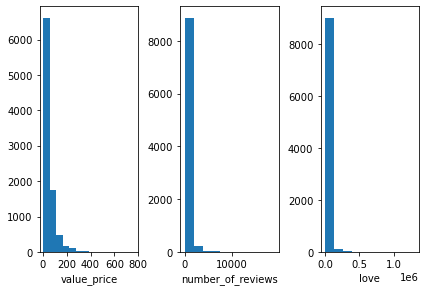

In [37]:
# Using matplotlib

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False)
plt.tight_layout()


ax1.hist(x=df.value_price)
ax1.set_xlabel('value_price')
ax1.set_xticks(np.arange(0, 1000, 200))

ax2.hist(x=df.number_of_reviews)
ax2.set_xlabel('number_of_reviews')

ax3.hist(x=df.love)
ax3.set_xlabel('love')

In [38]:
#top_ten_brands=df['brand'].value_counts(dropna=False, normalize=True)[:10].index.tolist()
#top_ten_product_type=df['category'].value_counts(dropna=False, normalize=True)[:10].index.tolist()[:9]
#top_ten_product_name=df['name'].value_counts(dropna=False, normalize=True)[:10].index.tolist()[:9]

Text(0.5, 0, 'Product category')

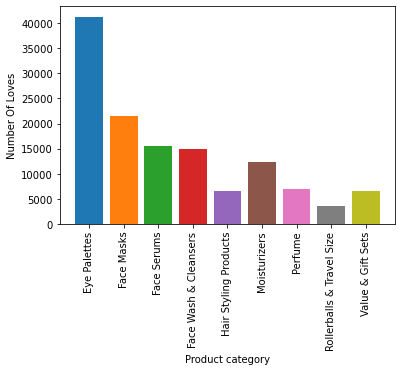

In [39]:
df_top_product_type=df.loc[df['category'].isin(top_ten_product_type)].dropna()
for product_type_1, df_product_type_1 in df_top_product_type.groupby('category'):
    avg_love=df_product_type_1.love.mean()
    plt.bar(product_type_1, height=avg_love)
plt.xticks(rotation=90)
plt.ylabel('Number Of Loves')
plt.xlabel('Product category')

Text(0.5, 0, 'Top Brands')

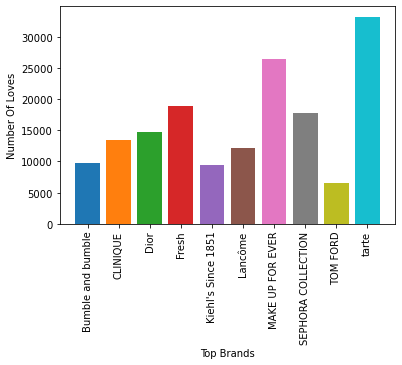

In [40]:
df_top_brands=df.loc[df['brand'].isin(top_ten_brands)]
for brand_1, df_brand_1 in df_top_brands.groupby('brand'):
    avg_love=df_brand_1.love.mean()
    plt.bar(brand_1, height=avg_love)
plt.xticks(rotation=90)
plt.ylabel('Number Of Loves')
plt.xlabel('Top Brands')

In [41]:
df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5.0,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,20.0,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,148.0,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,74.0,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5.0,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,0.0,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,0.0,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,28.0,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,0.0,5.0,46,0,50.0,50.0,...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


In [61]:
x = df.select_dtypes(include=['float64', 'int'])
x.head()


x = x.drop(['id'], axis=1)
x.head()


,size,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,5.0,4.0,4,3002,66.0,75.0,1,0,0,0
1,20.0,4.5,76,2700,66.0,66.0,1,0,0,0
2,148.0,4.5,26,2600,180.0,180.0,1,0,0,0
3,74.0,4.5,23,2900,120.0,120.0,1,0,0,0
4,5.0,3.5,2,943,72.0,80.0,1,0,0,0


In [43]:
#x = x.drop(list(df_dumy.columns), axis=1)  drop catgo

#x = pd.concat([x, df_dumy], axis=1)




x.head()

#df_c.head()

#df_c[:, 3]

#X = df_c.iloc[:, :-1].values

#X

,id,size,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,5.0,4.0,4,3002,66.0,75.0,1,0,0,0
1,2044816,20.0,4.5,76,2700,66.0,66.0,1,0,0,0
2,1417567,148.0,4.5,26,2600,180.0,180.0,1,0,0,0
3,1417617,74.0,4.5,23,2900,120.0,120.0,1,0,0,0
4,2218766,5.0,3.5,2,943,72.0,80.0,1,0,0,0


In [44]:



# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,2] = labelencoder.fit_transform(X[:,2])
onehotencoder = OneHotEncoder(categorical_features = [2])
X = onehotencoder.fit_transform(X).toarray()


NameError: name 'X' is not defined

<Figure size 1440x720 with 0 Axes>

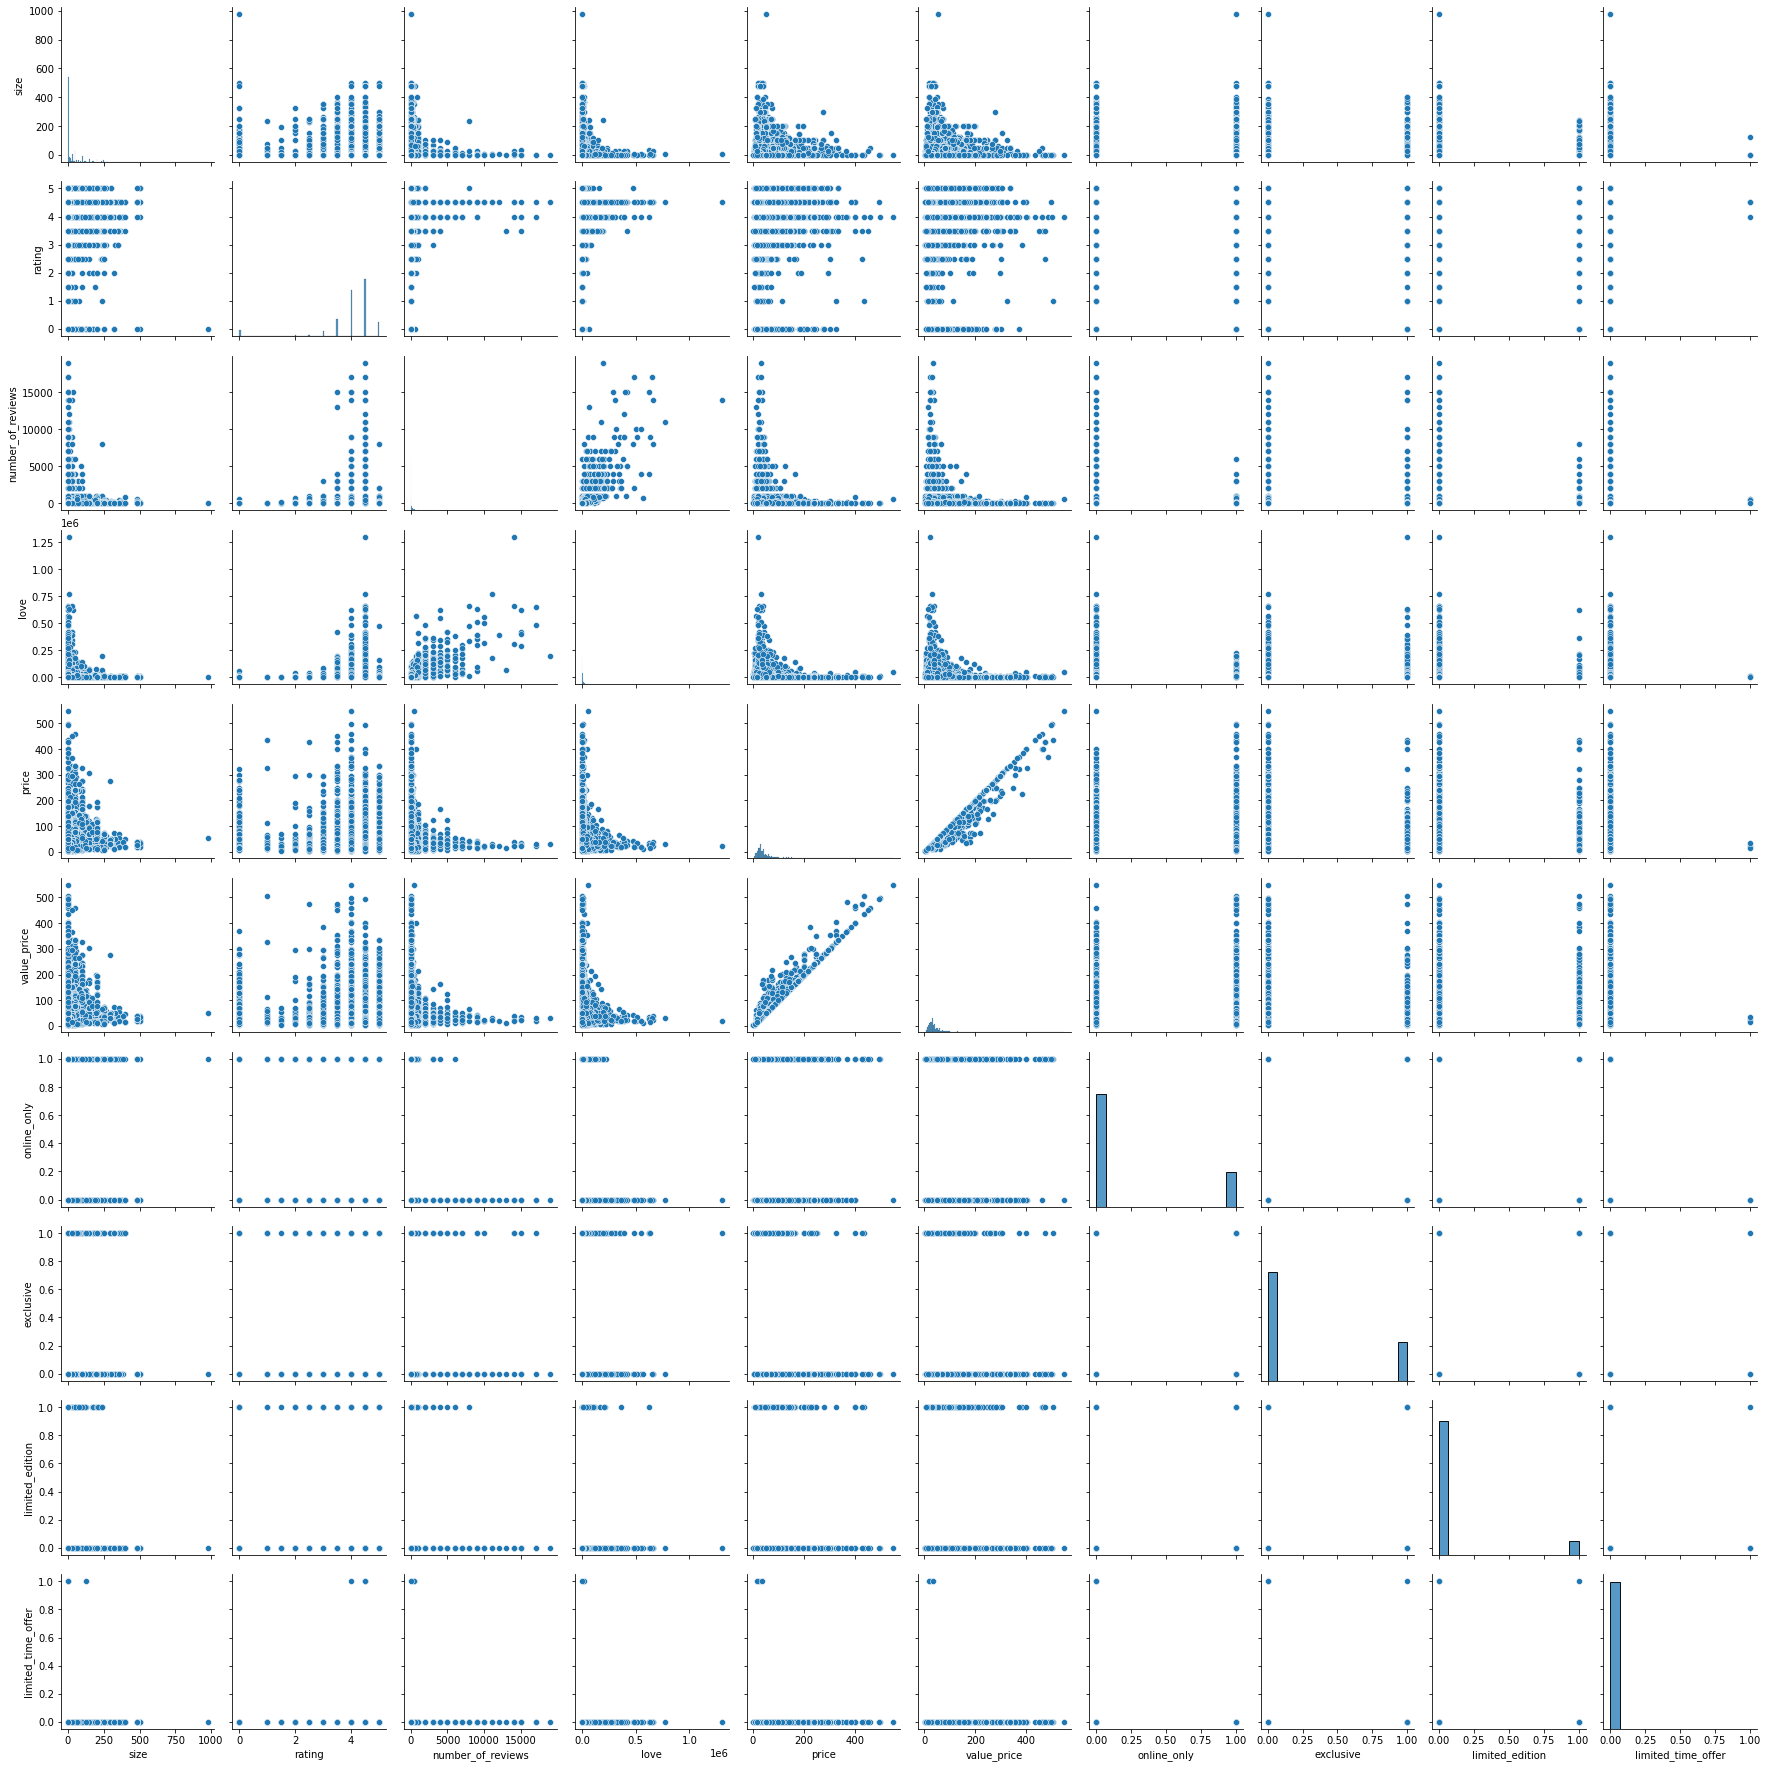

In [62]:
plt.figure(figsize=(20, 10))
sns.pairplot(x)
plt.show()


array([[<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'love'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'value_price'}>],
       [<AxesSubplot:title={'center':'online_only'}>,
        <AxesSubplot:title={'center':'exclusive'}>,
        <AxesSubplot:title={'center':'limited_edition'}>],
       [<AxesSubplot:title={'center':'limited_time_offer'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

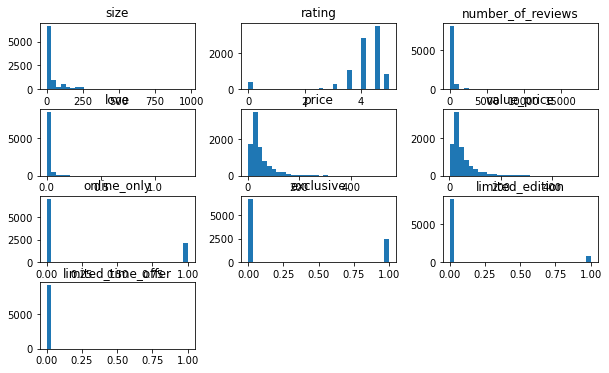

In [123]:
x.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [ ]:
#df.insert(len(x.columns), 'C_log',
        # np.log(x['price']))

In [ ]:

data['natural_log'] = np.log(data['Salary']) 
data   

data['logarithm_base2'] = np.log2(data['Salary']) 
data  

In [63]:
cor = x.corr()
cor

,size,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
size,1.000000,0.043179,-0.083944,-0.111683,0.054193,0.035945,0.059038,-0.049058,-0.135062,0.001850
rating,0.043179,1.000000,0.081478,0.094788,0.019559,0.001941,-0.123342,-0.001908,-0.130471,0.006164
number_of_reviews,-0.083944,0.081478,1.000000,0.746099,-0.084001,-0.088855,-0.137082,0.003799,-0.066661,0.000742
love,-0.111683,0.094788,0.746099,1.000000,-0.088724,-0.091140,-0.138933,0.050957,-0.046750,-0.002879
price,0.054193,0.019559,-0.084001,-0.088724,1.000000,0.983357,0.117250,-0.178809,0.015333,-0.009679
value_price,0.035945,0.001941,-0.088855,-0.091140,0.983357,1.000000,0.130658,-0.159005,0.079754,-0.009874
online_only,0.059038,-0.123342,-0.137082,-0.138933,0.117250,0.130658,1.000000,-0.077543,0.097353,-0.010023
exclusive,-0.049058,-0.001908,0.003799,0.050957,-0.178809,-0.159005,-0.077543,1.000000,0.166162,0.002814
limited_edition,-0.135062,-0.130471,-0.066661,-0.046750,0.015333,0.079754,0.097353,0.166162,1.000000,0.015129
limited_time_offer,0.001850,0.006164,0.000742,-0.002879,-0.009679,-0.009874,-0.010023,0.002814,0.015129,1.000000


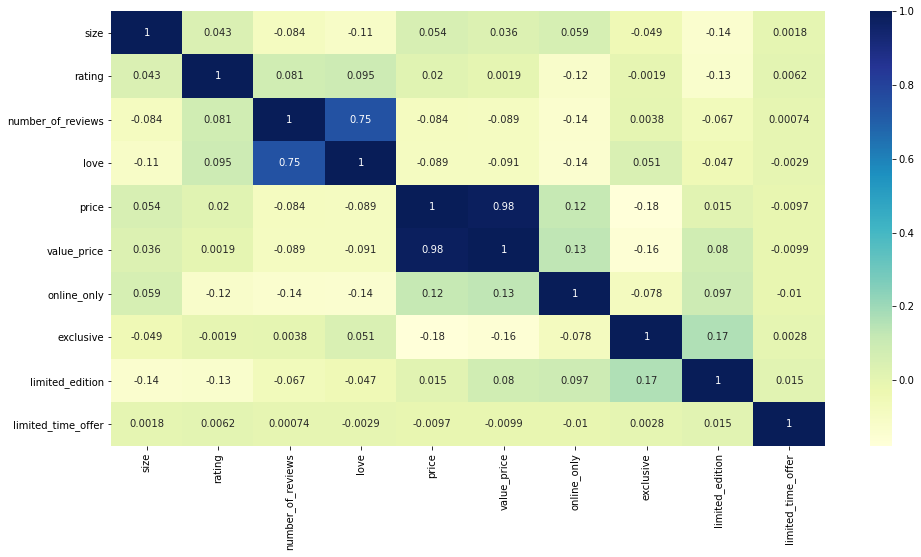

In [64]:

plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


In [65]:
df.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [102]:
#X = df[["size",'rating','value_price','number_of_reviews']]
X = df[["size",'price','number_of_reviews','rating']]


y = df["love"]




In [ ]:
columns = ['QUANTITY', 'PRICE', 'aaa']
for col in columns:
    df2["log-" + col] = np.log(df[col])

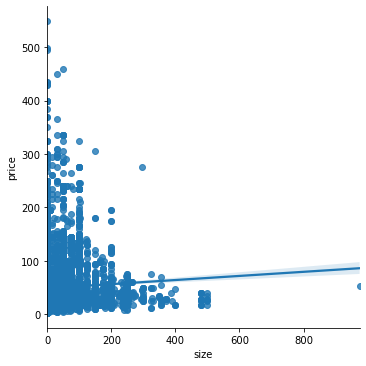

In [103]:
sns.lmplot(x="size", y='price', data=df )

In [104]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['size', 'price', 'number_of_reviews', 'rating'], dtype='object')

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=90)

In [107]:
X_train

,size,price,number_of_reviews,rating
1064,-0.524040,-0.425407,-0.213497,0.009905
5995,-0.524040,-0.043747,-0.303325,0.506108
5345,-0.524040,-0.764661,0.053740,-0.486299
180,-0.524040,1.482892,-0.219111,0.009905
3490,0.753555,1.779738,-0.301079,0.009905
...,...,...,...,...
4901,-0.524040,-0.531424,0.562390,0.506108
6815,1.354776,1.164842,-0.006893,0.506108
5746,-0.524040,-0.383001,1.928895,0.009905
2717,-0.524040,-0.340594,-0.314553,1.002311


In [108]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [109]:
#transformer.fit(X_train)

In [110]:
x_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

In [111]:
print(x_)

[[-4.48887401e-01  3.37912341e-01 -3.12307685e-01 ...  9.66054050e-04
  -3.06376068e-05  9.71646411e-07]
 [-2.23429476e-01  3.37912341e-01 -2.31462716e-01 ...  2.71147211e-02
  -5.92880473e-02  1.29637054e-01]
 [ 1.70047815e+00  2.75509127e+00 -2.87605056e-01 ...  4.18635528e-02
  -7.36686341e-02  1.29637054e-01]
 ...
 [-1.03185250e-01 -7.22253856e-01 -3.16799072e-01 ... -3.97404178e-01
  -4.96721725e+00 -6.20860286e+01]
 [-5.24040042e-01 -1.34084196e-03 -2.65148120e-01 ...  7.04660016e-02
  -2.66375086e-01  1.00694924e+00]
 [-5.24040042e-01 -1.34084196e-03 -3.16799072e-01 ... -3.97404178e-01
  -4.96721725e+00 -6.20860286e+01]]


In [112]:
model = LinearRegression().fit(x_, y)  
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [113]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [114]:
r_sq = model.score(x_, y)

print(r_sq)

0.550898245118174


In [115]:
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[-6333.90256084 -2397.85730732  8037.75381854 ... -9259.51850032
  9270.65264073   540.29568652]


In [116]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)


coefficient of determination: 0.550898245118174
intercept: 0.0
coefficients: [-1.37636809e+04 -3.80935895e+03  3.36698164e+04  9.97544094e+03
  6.16937621e+03  7.16954230e+02 -8.48549870e+03  4.01664808e+03
  4.25943879e+03  6.26394051e+03 -2.73199509e+02 -4.41624415e+02
  1.83066603e+04  8.44160717e+03 -7.33447692e+02 -3.58548961e+02
 -4.93930216e+03 -1.01373252e+03 -8.64921696e+02 -1.55085568e+04
 -8.89119804e+02  1.29899170e+03  4.76846973e+03 -1.24176056e+02
 -4.43097742e+02  3.29060004e+02  2.08936194e+02 -1.21646530e+03
  3.21325847e+03  1.75781885e+01 -2.20140005e+00 -9.87969631e+01
  1.10117340e+04  1.05030870e+03]


In [117]:
model = sm.OLS(y, x_).fit()
ypred = model.predict(x_) 

ypred.shape
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   love   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              416.9
Date:                Tue, 19 Oct 2021   Prob (F-statistic):                        0.00
Time:                        10:57:15   Log-Likelihood:                     -1.0707e+05
No. Observations:                9168   AIC:                                  2.142e+05
Df Residuals:                    9134   BIC:                                  2.144e+05
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.376e+04    755.494    -18.218      0.000   -1.52e+04   -1.23e+04
x2         -3809.3590    742.755     -5.129      0.000   -5265.326   -2353.392
x3          3.367e+04   1264.604     26.625      0.000    3.12e+04    3.61e+04
x4          9975.4409    818.984     12.180      0.000    8370.050    1.16e+04
x5          6169.3762    406.479     15.178      0.000    5372.587    6966.165
x6           716.9542    913.592      0.785      0.433   -1073.891    2507.800
x7         -8485.4987   2009.172     -4.223      0.000   -1.24e+04   -4547.072
x8          4016.6481   1148.177      3.498      0.000    1765.964    6267.332
x9          4259.4388    359.431     11.851      0.000    3554.874    4964.003
x10         6263.9405   1977.335      3.168      0.002    2387.921    1.01e+04
x11         -273.1995   1165.514     -0.234      0.815   -2557.867    2011.468
x12         -441.6244    228.989     -1.929      0.054    -890.495       7.246
x13         1.831e+04   2253.064      8.125      0.000    1.39e+04    2.27e+04
x14         8441.6072    857.432      9.845      0.000    6760.848    1.01e+04
x15         -733.4477     48.380    -15.160      0.000    -828.283    -638.612
x16         -358.5490    312.246     -1.148      0.251    -970.621     253.523
x17        -4939.3022    615.446     -8.026      0.000   -6145.714   -3732.890
x18        -1013.7325    126.320     -8.025      0.000   -1261.348    -766.117
x19         -864.9217    230.941     -3.745      0.000   -1317.617    -412.226
x20        -1.551e+04   1638.484     -9.465      0.000   -1.87e+04   -1.23e+04
x21         -889.1198    431.940     -2.058      0.040   -1735.818     -42.422
x22         1298.9917    199.484      6.512      0.000     907.959    1690.024
x23         4768.4697   3588.282      1.329      0.184   -2265.365    1.18e+04
x24         -124.1761    204.107     -0.608      0.543    -524.272     275.919
x25         -443.0977     40.722    -10.881      0.000    -522.921    -363.274
x26          329.0600    457.833      0.719      0.472    -568.394    1226.514
x27          208.9362    119.668      1.746      0.081     -25.640     443.512
x28        -1216.4653    272.113     -4.470      0.000   -1749.868    -683.063
x29         3213.2585   3458.637      0.929      0.353   -3566.444    9992.961
x30           17.5782    178.852      0.098      0.922    -333.012     368.168
x31           -2.2014      9.662     -0.228      0.820     -21.141      16.738
x32          -98.7970    158.408     -0.624      0.533    -409.312     211.719
x33         1.101e+04   1771.160      6.217      0.000    7539.865    1.45e+04
x34         1050.3087    206.226      5.093      0.000     646.060    1454.557
=============================================================

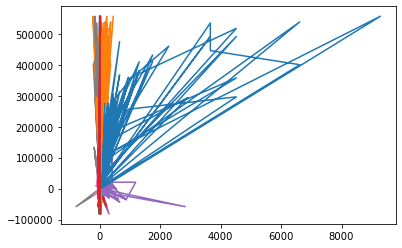

In [118]:
#plt.scatter(X,y)
plt.plot(x_,ypred)

In [122]:
df_log['price'] = np.log(X['price'])
sns.distplot(df_set['price'], fit=norm)
fig = plt.figure()

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


NameError: name 'df_log' is not defined

In [720]:
model = sm.OLS(y_train, X_train)

#table = sm.stats.anova_lm(moore_lm, typ=2)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   love   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.506
Method:                 Least Squares   F-statistic:                              1645.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:48:49   Log-Likelihood:                         -75937.
No. Observations:                6417   AIC:                                  1.519e+05
Df Residuals:                    6413   BIC:                                  1.519e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
size              -2179.3898    419.971     -5.189      0.000   -3002.673   -1356.106
rating             1515.4082    419.911      3.609      0.000     692.242    2338.575
value_price        -840.9620    417.140     -2.016      0.044   -1658.696     -23.228
number_of_reviews  3.299e+04    417.635     78.986      0.000    3.22e+04    3.38e+04
==============================================================================
Omnibus:                     7737.691   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5555237.996
Skew:                           5.753   Prob(JB):                         0.00
Kurtosis:                     146.682   Cond. No.                         1.17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [721]:
from sklearn.linear_model import LinearRegression


In [722]:
lm = LinearRegression(fit_intercept=True)

In [723]:
lm.fit(X_train, y_train)

LinearRegression()

In [724]:
coeff_df= pd.DataFrame(lm.coef_,X.columns,columns=["Coefficient"])

In [725]:
print(coeff_df)
print("   ")
print(lm.coef_) #m    same coeff
print(lm.intercept_) #b

                    Coefficient
size               -2032.253781
rating              1576.678000
value_price         -863.583965
number_of_reviews  32900.012840
   
[-2032.25378059  1576.67800042  -863.58396479 32900.01283977]
16385.84103484204


In [726]:
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))



# Check the R-squared value of the model on the training data
#lm.score(df_train[['x1','x2']], df_train['y'])

0.5153613567874004


In [727]:
X_test

,size,rating,value_price,number_of_reviews
8722,-0.524040,0.506108,-0.057093,-0.269640
2496,-0.524040,-3.959721,-0.764788,-0.316799
5180,0.227486,1.002311,0.670822,-0.314553
8608,-0.373735,1.002311,-0.441270,-0.306693
3161,0.227486,0.506108,0.832581,-0.255042
...,...,...,...,...
2900,-0.524040,0.009905,-0.845667,-0.299956
7602,-0.343674,0.009905,-0.744568,-0.243814
1247,-0.524040,0.506108,0.691042,-0.305571
8897,-0.396281,0.506108,-0.077312,-0.197777


In [728]:
pred= lm.predict(X_test)

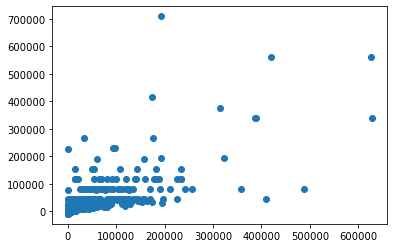

In [730]:
plt.scatter(y_test, pred)

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='love', ylabel='Density'>

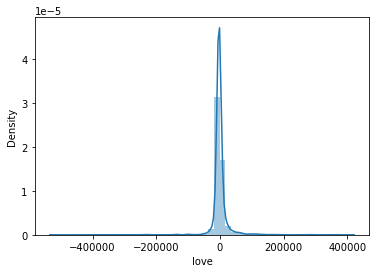

In [731]:
sns.distplot((y_test-pred), bins=50)

In [661]:
from sklearn import metrics

In [705]:
print("MAE", metrics.mean_absolute_error(y_test, pred))
print("MSE", metrics.mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))




MAE 9.513823712438951e-12
MSE 3.194104864716259e-22
RMSE 1.7872058820170268e-11


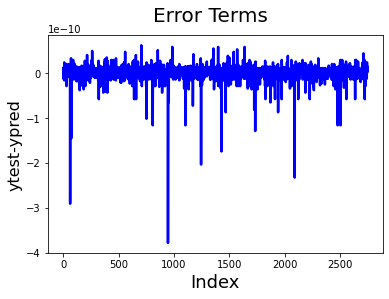

In [706]:
# Error terms
c = [i for i in range(len(pred))]
fig = plt.figure()
plt.plot(c,y_test-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

/Users/safarji/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


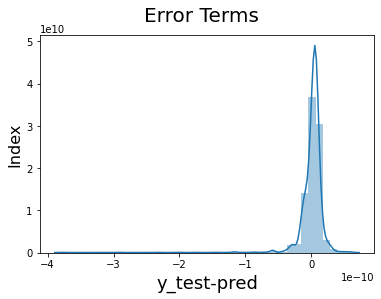

In [707]:
# Plotting the error terms 
fig = plt.figure()
sns.distplot((y_test-pred),bins=40)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()


In [708]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [709]:
#y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=df, return_type="dataframe")
#X_train, y_train
# Create your model
model = sm.OLS(y_train, X_train)

#table = sm.stats.anova_lm(moore_lm, typ=2)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   love   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              9624.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:47:58   Log-Likelihood:                         -71334.
No. Observations:                6417   AIC:                                  1.427e+05
Df Residuals:                    6412   BIC:                                  1.427e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
size               -141.9663    205.488     -0.691      0.490    -544.791     260.858
rating              -64.1300    205.262     -0.312      0.755    -466.512     338.252
love               4.269e+04    298.145    143.193      0.000    4.21e+04    4.33e+04
value_price          24.2603    203.702      0.119      0.905    -375.064     423.585
number_of_reviews    18.6905    307.517      0.061      0.952    -584.145     621.526
==============================================================================
Omnibus:                     1692.497   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88719.466
Skew:                          -0.426   Prob(JB):                         0.00
Kurtosis:                      21.196   Cond. No.                         2.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [710]:
X_train

,size,rating,love,value_price,number_of_reviews
3972,1.955997,0.009905,-0.369461,1.014560,-0.314553
2505,-0.524040,0.506108,3.058887,0.407964,0.806048
5989,-0.403796,0.506108,-0.302284,-0.501930,-0.264025
3514,-0.524040,0.506108,2.185734,0.003567,0.565759
4196,-0.524040,0.009905,-0.363546,-0.178412,-0.307816
...,...,...,...,...,...
599,-0.073124,0.009905,-0.330451,0.873021,-0.312308
5695,-0.524040,-0.486299,-0.346881,-0.825447,-0.306693
8006,-0.463918,0.506108,-0.304632,-0.663688,-0.294342
1361,-0.524040,0.506108,2.244413,-0.603029,-0.157355


In [711]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
#data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
  
# the independent variables set
#X = data[['Gender', 'Height', 'Weight']]
  #SMLIT
# VIF dataframe
#vif_data = pd.DataFrame()


In [669]:

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature       VIF
0         size  1.016291
1       rating  1.012143
2         love  1.030951
3  value_price  1.009147


In [670]:
df1 = pd.read_csv('/Users/safarji/Desktop/output.csv')

df1

,Unnamed: 0,name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings,url
0,0,رواح للوحدات السكنية,Al Muraysīyah Show on map,SAR 190,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews,https://www.booking.com/hotel/sa/twrnt-ll-jnh-...
1,1,Aloft Riyadh Hotel,"Al Olaya, Riyadh Show on map",SAR 475,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews",https://www.booking.com/hotel/sa/aloft-riyadh....
2,2,Nourth House ApartHotel,Al Qurayyat Show on map,SAR 200,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews,https://www.booking.com/hotel/sa/nwrth-hws-lqr...
3,3,Dyar Al Hamra Hotel,"Al Hamra, Jeddah Show on map",SAR 340,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews",https://www.booking.com/hotel/sa/dyar-inn.en-g...
4,4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh Show on map,SAR 525,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews",https://www.booking.com/hotel/sa/courtyard-riy...
...,...,...,...,...,...,...,...,...,...,...,...
1178,49,العييري للوحدات المفروشة الباحة3,Waḩţān Show on map,SAR 110,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews,/hotel/sa/l-yyry-llwhdt-lskny-lmfrwsh-lbh-3-lb...
1179,50,Anwar Al Zahraa Hotel,"Central Madinah, Al Madinah Show on map",SAR 100,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews,/hotel/sa/anwar-al-zahraa.en-gb.html?aid=30414...
1180,51,OYO 242 Al Ahlam Resort Al Leith,Al Lith Show on map,SAR 387,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews,/hotel/sa/al-ahlam-resort-alleith.en-gb.html?a...
1181,52,فندق سوار,Sīdī Ḩamzah Show on map,SAR 145,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews,/hotel/sa/sewar.en-gb.html?aid=304142&label=ge...


In [671]:

df1.drop(['Unnamed: 0','url'], axis = 1, inplace=True)




In [672]:
df1.duplicated().sum()

297

In [673]:
df1.reset_index()

,index,name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings
0,0,رواح للوحدات السكنية,Al Muraysīyah Show on map,SAR 190,"1 night, 1 adult",One-Bedroom Apartment,"2 beds\r\n(1 extra-large double, 1 sofa bed)",7.5,Good,180 reviews
1,1,Aloft Riyadh Hotel,"Al Olaya, Riyadh Show on map",SAR 475,"1 night, 1 adult","Breezy Room, Guest room, 1 King",1 extra-large double bed,8.2,Very good,"2,947 reviews"
2,2,Nourth House ApartHotel,Al Qurayyat Show on map,SAR 200,"1 night, 1 adult",Budget Twin Room,2 single beds,7.5,Good,264 reviews
3,3,Dyar Al Hamra Hotel,"Al Hamra, Jeddah Show on map",SAR 340,"1 night, 1 adult",Junior Suite King,1 extra-large double bed,7.7,Good,"3,923 reviews"
4,4,Courtyard by Marriott Riyadh Northern Ring Road,Riyadh Show on map,SAR 525,"1 night, 1 adult","Standard, Guest room, 1 King",1 extra-large double bed,8.1,Very good,"1,032 reviews"
...,...,...,...,...,...,...,...,...,...,...
1178,1178,العييري للوحدات المفروشة الباحة3,Waḩţān Show on map,SAR 110,"1 night, 2 adults",Double Room with Private Bathroom,2 single beds,3.7,Review score,72 reviews
1179,1179,Anwar Al Zahraa Hotel,"Central Madinah, Al Madinah Show on map",SAR 100,"1 night, 2 adults",Double Room,2 single beds,7.3,Good,260 reviews
1180,1180,OYO 242 Al Ahlam Resort Al Leith,Al Lith Show on map,SAR 387,"1 night, 2 adults",Standard Studio Double,1 double bed,6.5,Review score,333 reviews
1181,1181,فندق سوار,Sīdī Ḩamzah Show on map,SAR 145,"1 night, 2 adults",Small Twin Room,2 single beds,8.6,Fabulous,22 reviews


In [674]:
df1.drop_duplicates(keep='first', inplace=True)

In [675]:
df1.count()

name                 886
location             886
price                886
price_for            886
room_type            886
beds                 881
rating               854
rating_title         854
number_of_ratings    854
dtype: int64

In [676]:
df1.shape

(886, 9)

In [677]:
df1.count()


name                 886
location             886
price                886
price_for            886
room_type            886
beds                 881
rating               854
rating_title         854
number_of_ratings    854
dtype: int64